___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [79]:
!pip install pandas_datareader
!pip install yfinance
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import yfinance as yf

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK.

In [63]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [64]:
#In this case, we are using yfinance
# Bank of America
BAC = yf.download("BAC", start=start, end=end)

# CitiGroup
C = yf.download("C", start=start, end=end)

# Goldman Sachs
GS = yf.download("GS", start=start, end=end)

# JPMorgan Chase
JPM = yf.download("JPM", start=start, end=end)

# Morgan Stanley
MS = yf.download("MS", start=start, end=end)

# Wells Fargo
WFC = yf.download("WFC", start=start, end=end)

C:\Users\cakaj\AppData\Local\Temp\ipykernel_94888\216992040.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  BAC = yf.download("BAC", start=start, end=end)
[*********************100%***********************]  1 of 1 completed
C:\Users\cakaj\AppData\Local\Temp\ipykernel_94888\216992040.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  C = yf.download("C", start=start, end=end)
[*********************100%***********************]  1 of 1 completed
C:\Users\cakaj\AppData\Local\Temp\ipykernel_94888\216992040.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  GS = yf.download("GS", start=start, end=end)
[*********************100%***********************]  1 of 1 completed
C:\Users\cakaj\AppData\Local\Temp\ipykernel_94888\216992040.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  JPM = yf.download("JPM", start=start, end=end)
[*********************100%

In [65]:
# Multi-ticker download using yfinance (replaces old Panel/DataReader approach)
tickers = ['BAC','C','GS','JPM','MS','WFC']
df = yf.download(tickers, start=start, end=end, group_by='ticker')

C:\Users\cakaj\AppData\Local\Temp\ipykernel_94888\2678434320.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start=start, end=end, group_by='ticker')
[*********************100%***********************]  6 of 6 completed


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [66]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [67]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

** Set the column name levels (this is filled out for you):**

In [68]:
bank_stocks.columns = bank_stocks.columns.droplevel(0)
bank_stocks = bank_stocks.swaplevel(0, 1, axis=1)
bank_stocks = bank_stocks.sort_index(axis=1)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [69]:
bank_stocks.head()

Bank Ticker        BAC                                                      C  \
Stock Info       Close       High        Low       Open    Volume       Close   
Date                                                                            
2006-01-03   30.819620  30.885081  30.210821  30.714878  16296700  317.449615   
2006-01-04   30.492308  30.924358  30.407206  30.767248  17757900  311.588928   
2006-01-05   30.531588  30.655967  30.322109  30.492312  14970700  313.134674   
2006-01-06   30.485758  30.708329  30.341740  30.636321  12599800  313.134674   
2006-01-09   30.505404  30.747616  30.348296  30.583960  15619400  311.653320   

Bank Ticker                                               ...         MS  \
Stock Info         High         Low        Open   Volume  ...      Close   
Date                                                      ...              
2006-01-03   318.029252  309.849896  315.581890  1537600  ...  31.522438   
2006-01-04   316.226060  311.395723  314.680356  1870960  ...  31.544071   
2006-01-05   314.165130  311.717767  311.975381  1143160  ...  31.630554   
2006-01-06   314.937992  310.429677  314.809175  1370210  ...  31.663002   
2006-01-09   313.907477  311.073684  313.005819  1680740  ...  31.998175   

Bank Ticker                                                  WFC             \
Stock Info        High        Low       Open   Volume      Close       High   
Date                                                                          
2006-01-03   31.619746  30.673695  30.906151  5377000  18.469467  18.512891   
2006-01-04   32.046830  31.544071  31.733283  7977800  18.255245  18.423149   
2006-01-05   31.673803  31.365661  31.652179  5778000  18.234982  18.269720   
2006-01-06   31.814370  31.381889  31.771123  6889800  18.342104  18.397107   
2006-01-09   32.052236  31.690032  31.695439  4144500  18.339203  18.426051   

Bank Ticker                                  
Stock Info         Low       Open    Volume  
Date                                         
2006-01-03   18.061286  18.295774  11016400  
2006-01-04   18.159713  18.411569  10870000  
2006-01-05   18.127869  18.237876  10158000  
2006-01-06   18.171305  18.284206   8403800  
2006-01-09   18.269726  18.339203   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [74]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     37.271400
C      378.467712
GS     184.167343
JPM     53.088608
MS      49.414936
WFC     43.540516
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [75]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [76]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.005772   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.001110
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001026    0.005875
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586   -0.000158

** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

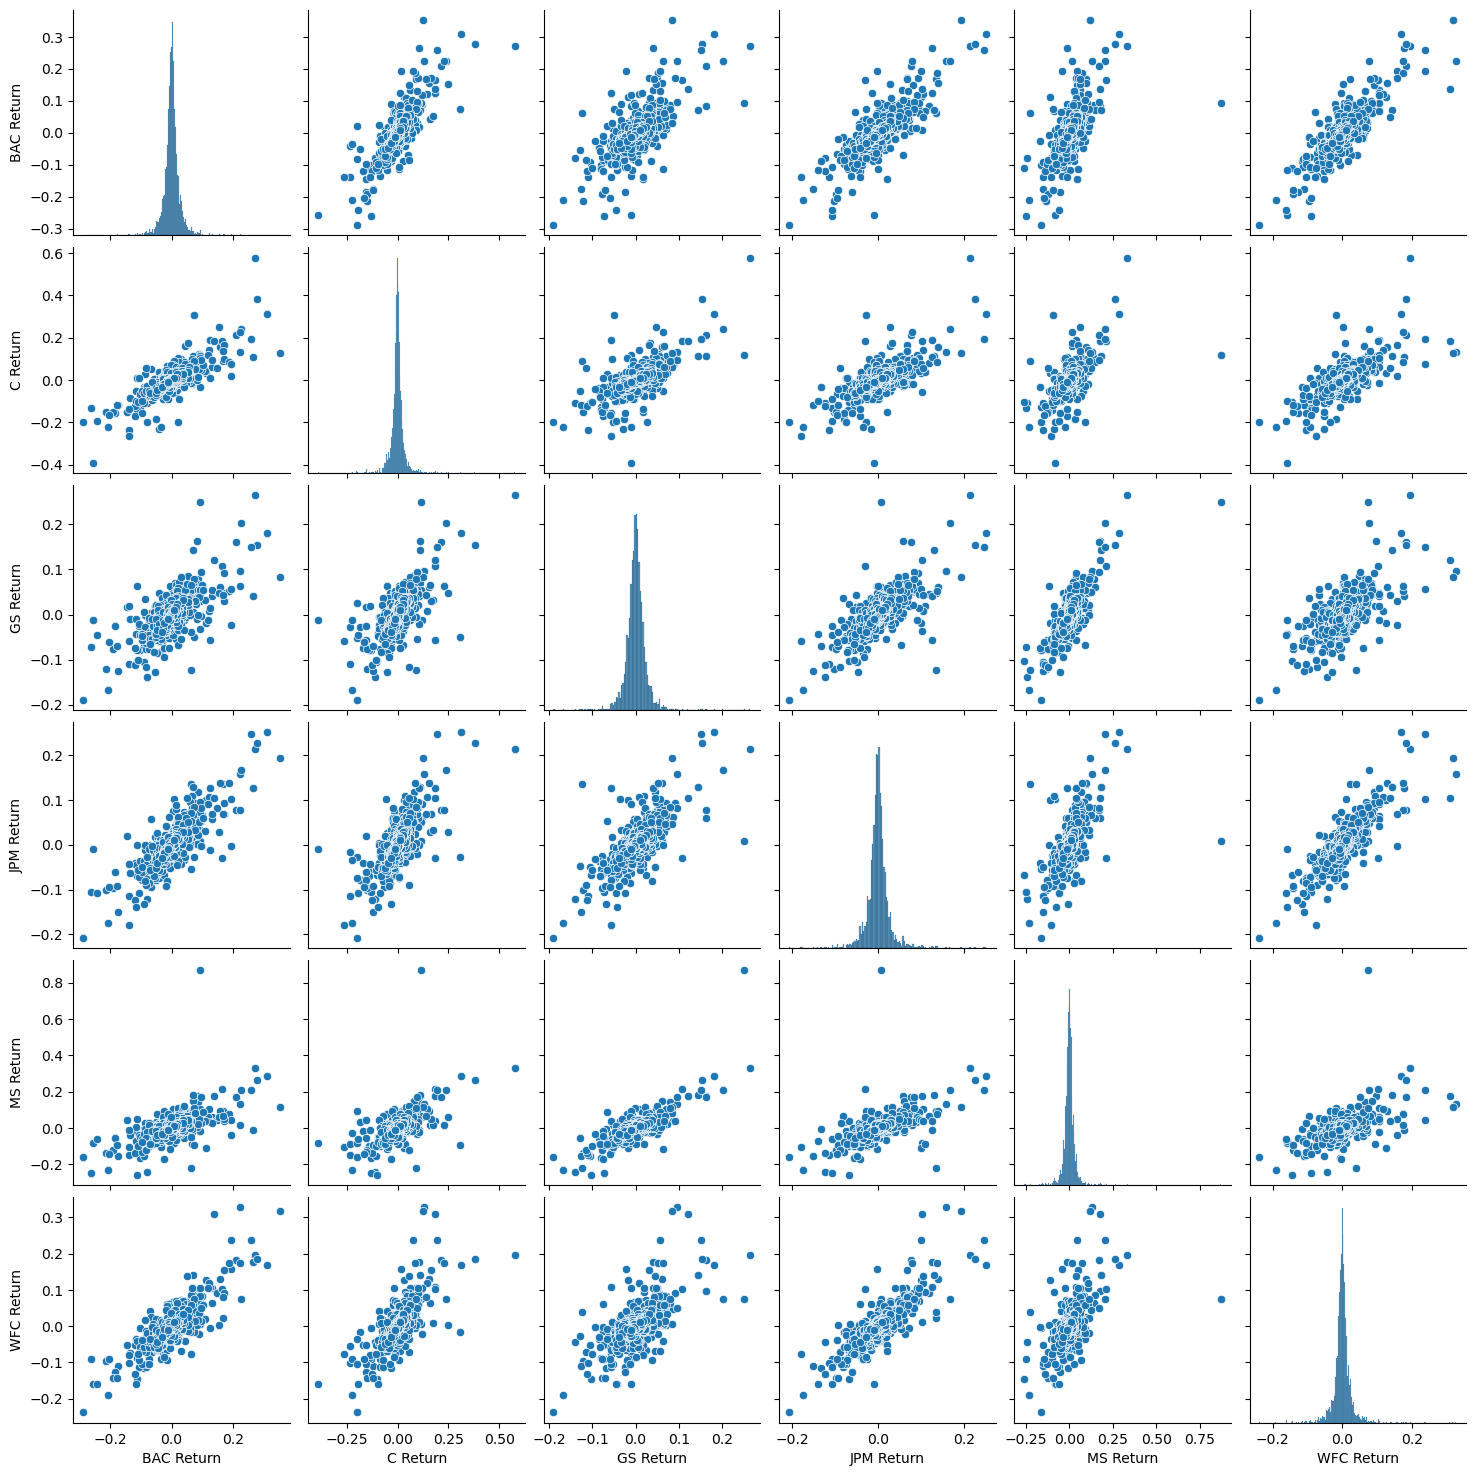

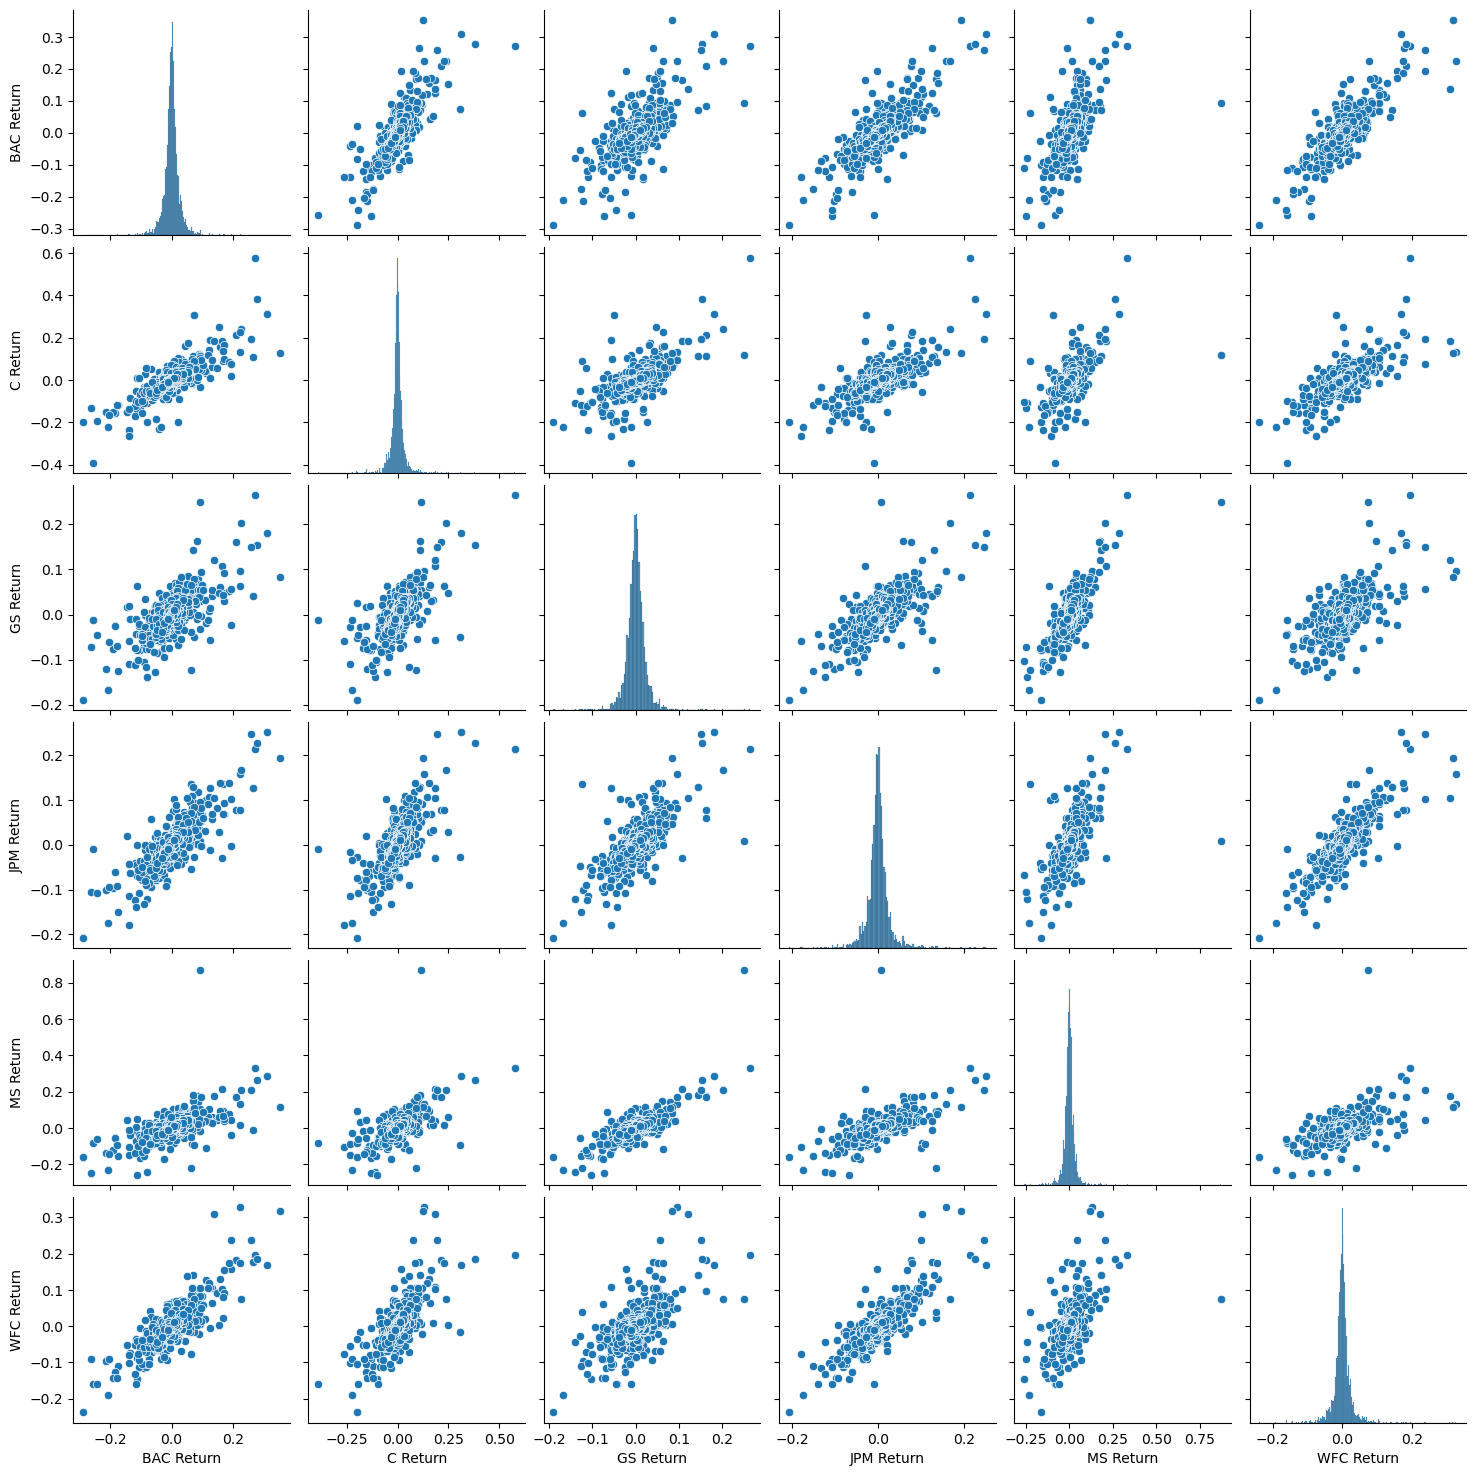

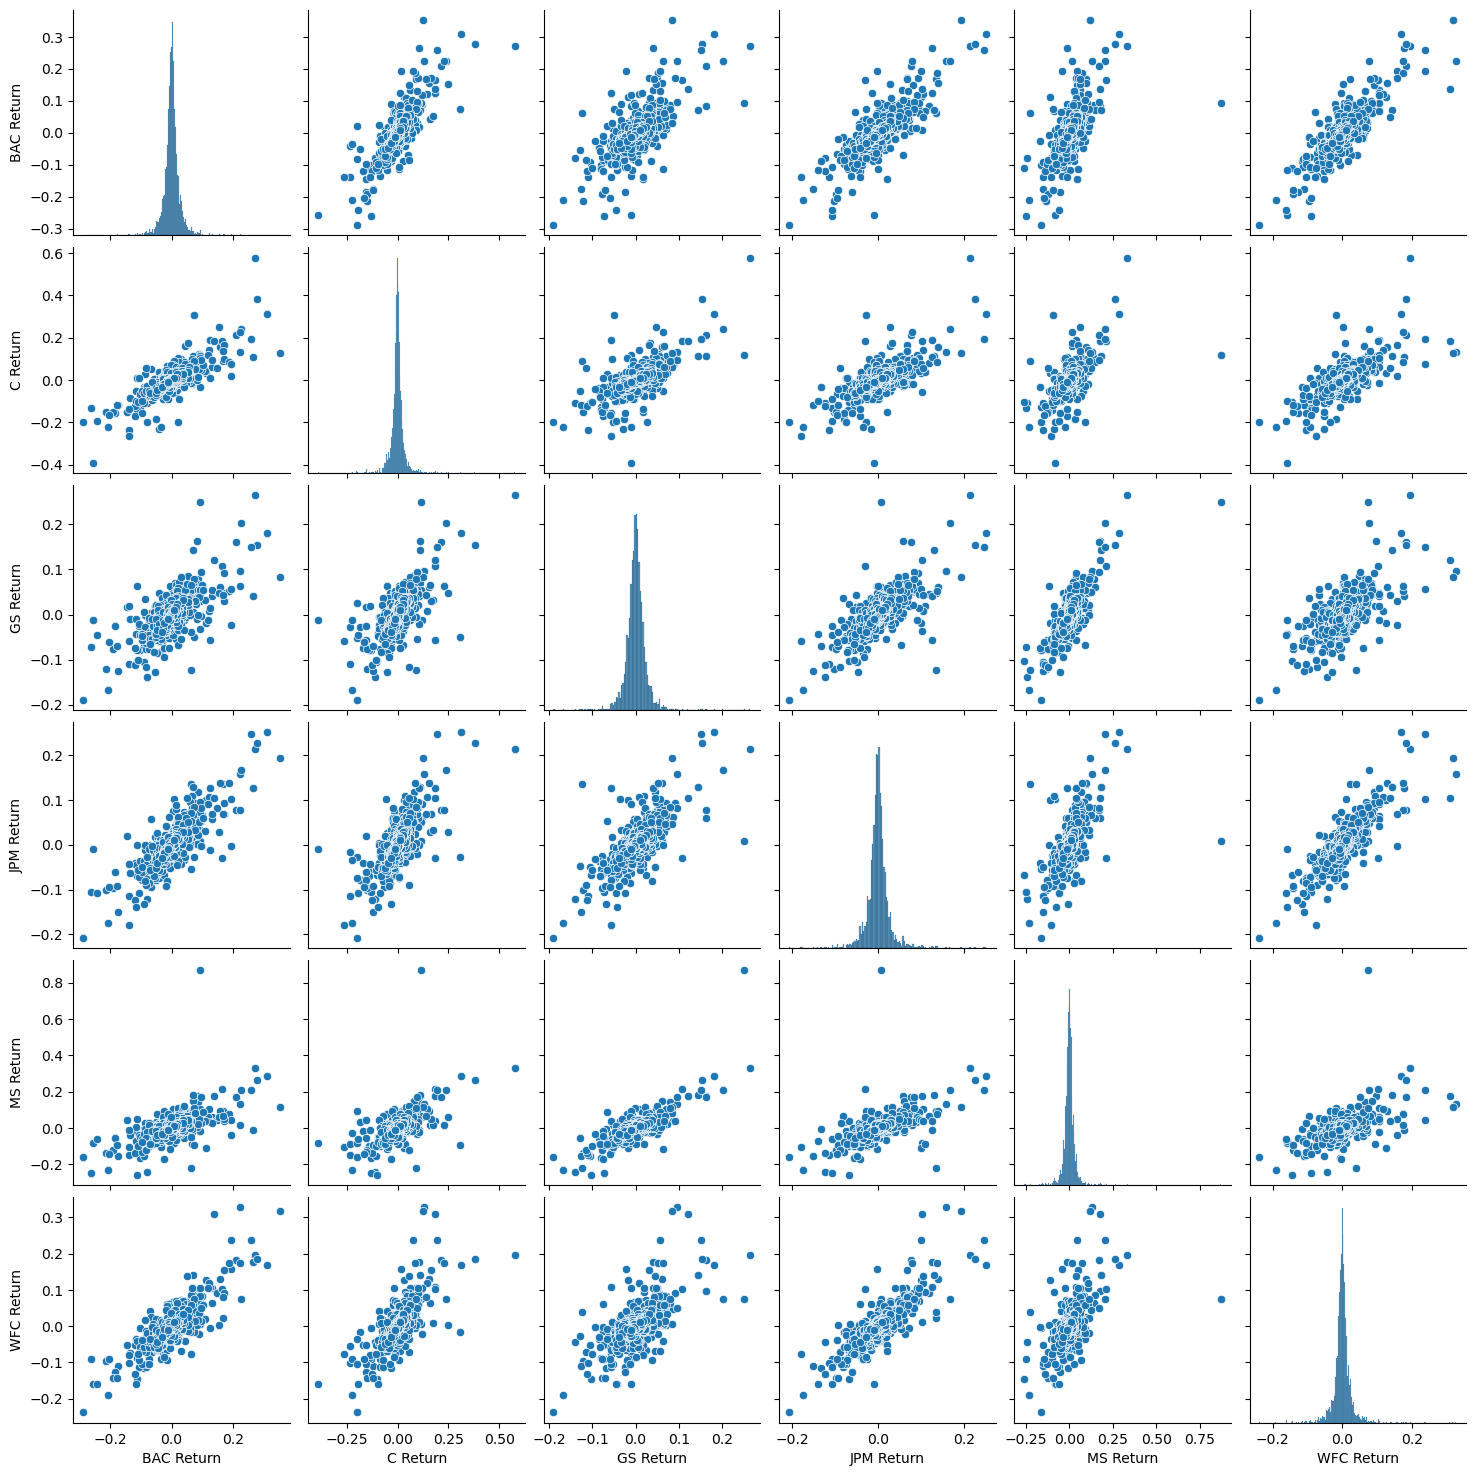

In [80]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])
plt.show()

Background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 

You'll also see the enormous crash in value if you take a look a the stock price plot (which we do later in the visualizations.)

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [81]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

[Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)

In [82]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [83]:
returns.std() # Citigroup riskiest

BAC Return    0.036659
C Return      0.038672
GS Return     0.025386
JPM Return    0.027675
MS Return     0.037717
WFC Return    0.030195
dtype: float64

In [85]:
returns.loc['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

BAC Return    0.016174
C Return      0.015288
GS Return     0.014043
JPM Return    0.014006
MS Return     0.016287
WFC Return    0.012552
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\cakaj\AppData\Local\Temp\ipykernel_94888\1569847069.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)


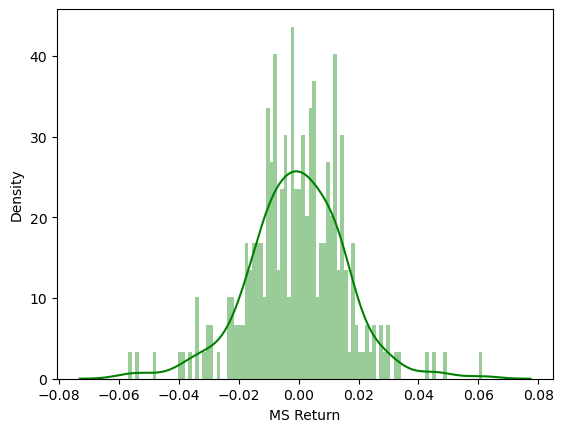

In [87]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)
plt.show()

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\cakaj\AppData\Local\Temp\ipykernel_94888\3291767074.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)


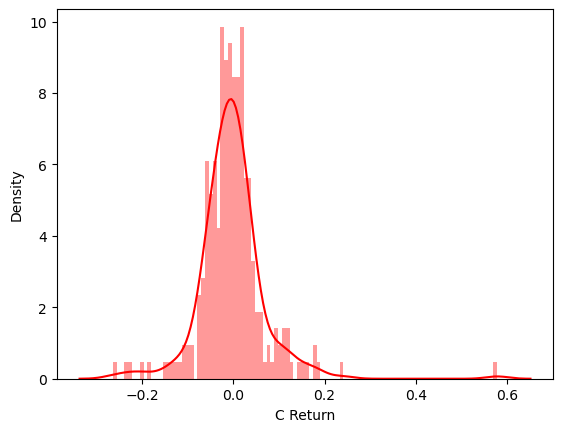

In [89]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)
plt.show()

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [91]:
!pip install cufflinks plotly

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68723 sha256=66f6920704ab298083d13d595b9e2b3346192cf3cc550b443cdbe159437a2737
  Stored in directory: c:\users\cakaj\appdata\local\pip\cache\wheels\13\bc\65\1ac45445dba1052b5e837dc49f5282c8cb2f934ae9e6f62f0e
Successfully built cufflinks

   ---------------------------------------- 2/2 [cufflinks]



  DEPRECATION: Building 'cufflinks' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'cufflinks'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

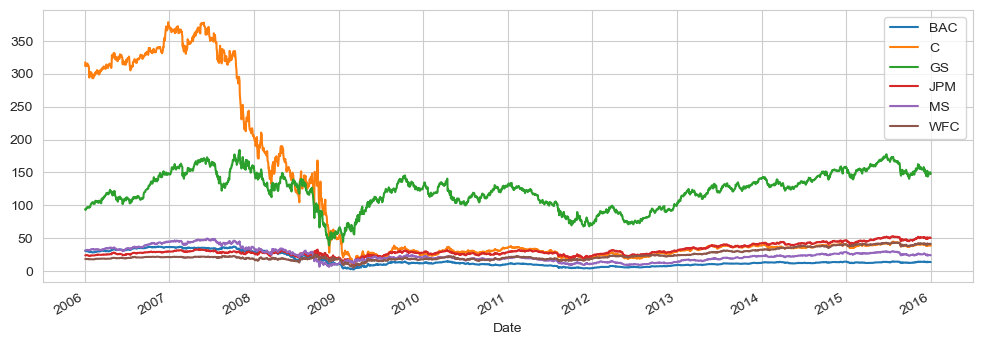

In [95]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()
plt.show()

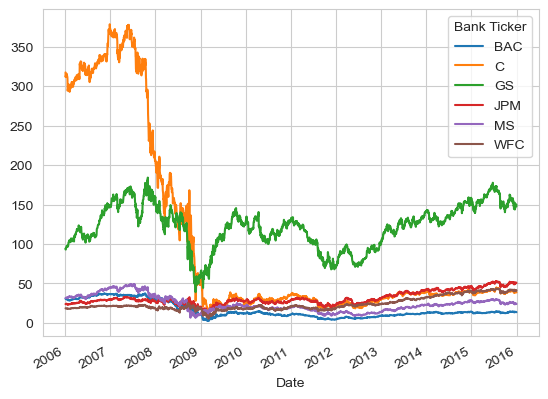

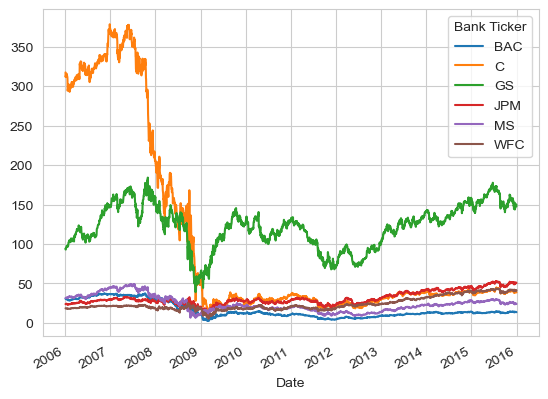

In [97]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()
plt.show()

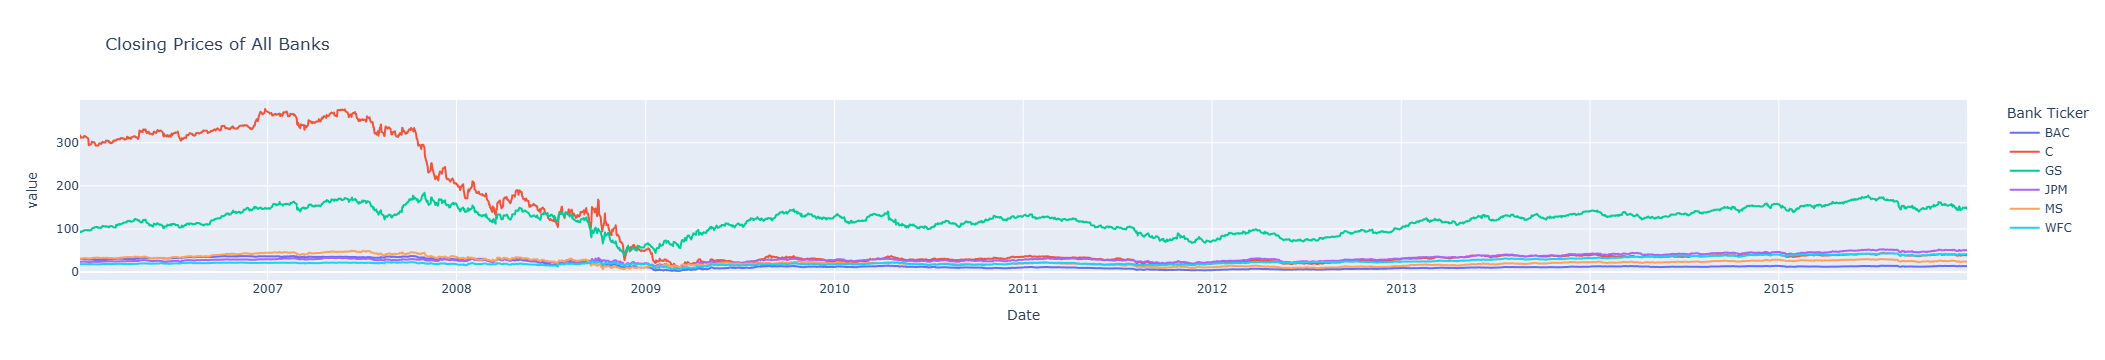

In [102]:
#Can't use cufflinks, need to use plotly express
import plotly.express as px

# Select Close prices across banks
close_prices = bank_stocks.xs('Close', axis=1, level='Stock Info')

# Modern Plotly plot (replacement for cufflinks)
fig = px.line(close_prices, title='Closing Prices of All Banks')
fig.show()


## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

<Figure size 1200x600 with 0 Axes>

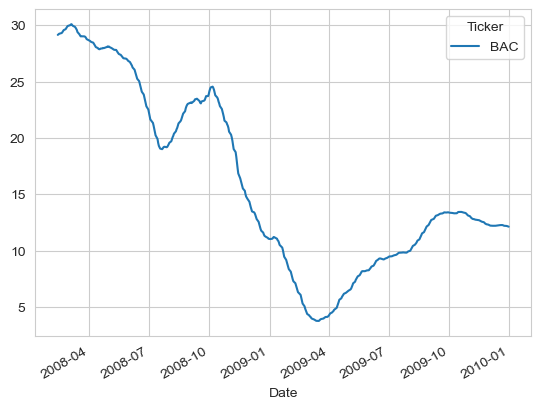

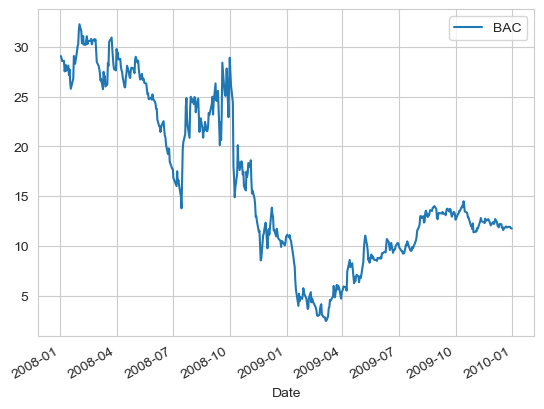

<Figure size 1200x600 with 0 Axes>

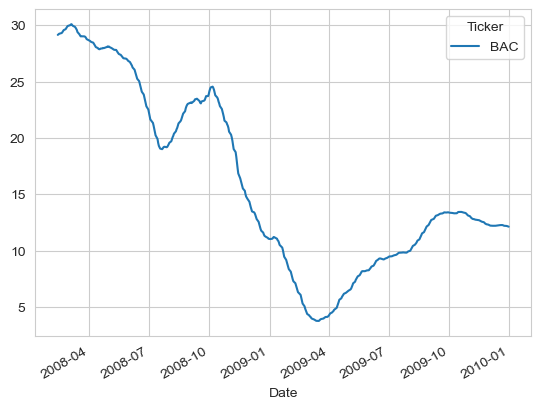

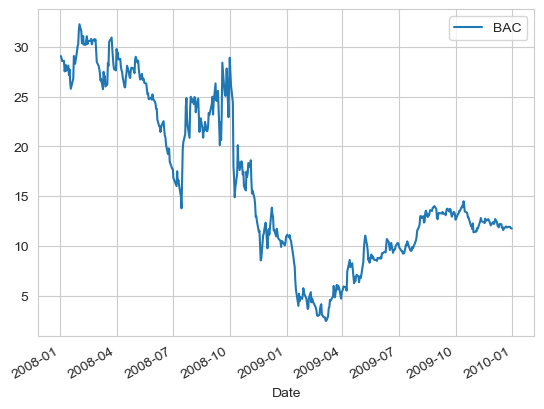

In [104]:
plt.figure(figsize=(12,6))

close_slice = BAC['Close'].loc['2008':'2009']

close_slice.rolling(30).mean().plot(label='30 Day Avg')
close_slice.plot(label='BAC CLOSE')

plt.legend()
plt.show()

** Create a heatmap of the correlation between the stocks Close Price.**

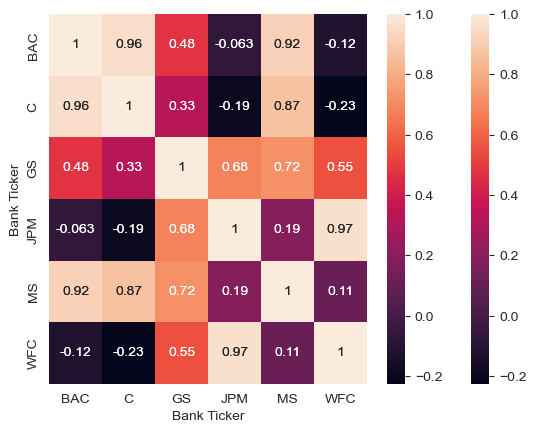

In [106]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)
plt.show()

** Optional: Use seaborn's clustermap to cluster the correlations together:**

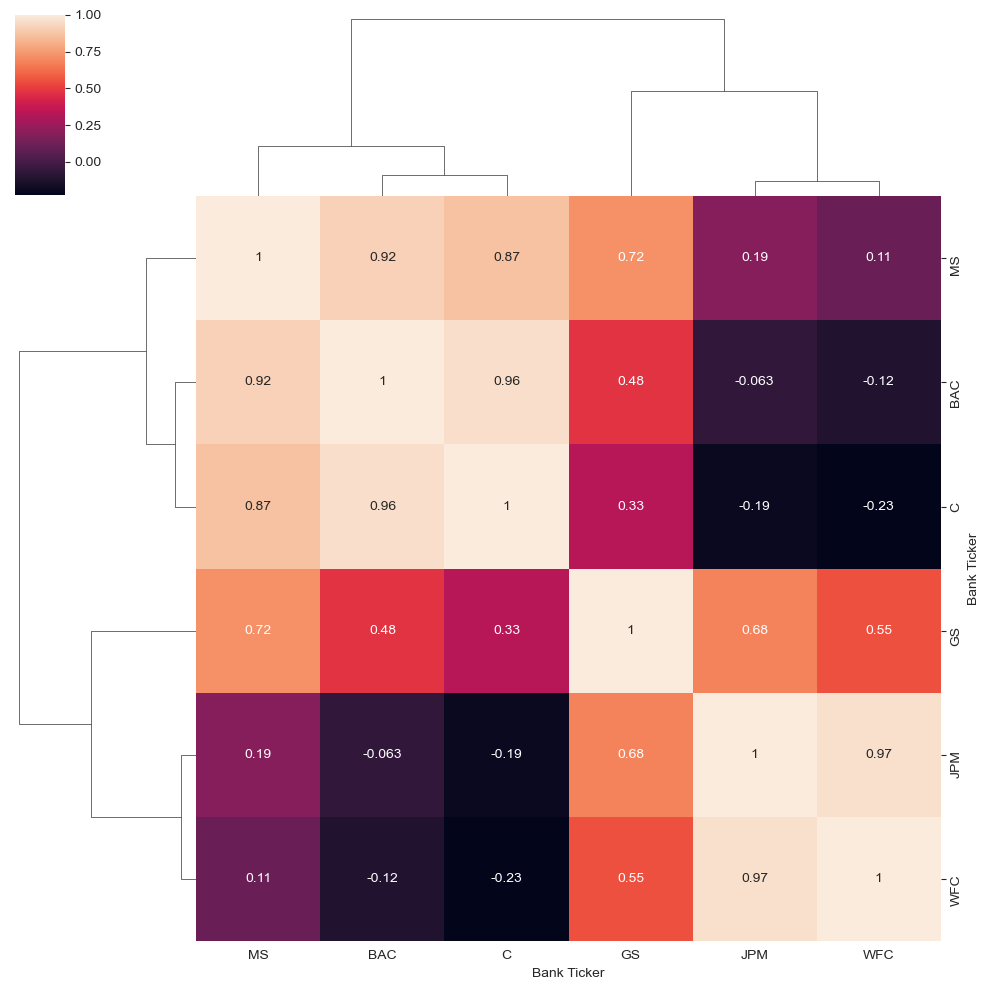

In [107]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)
plt.show()

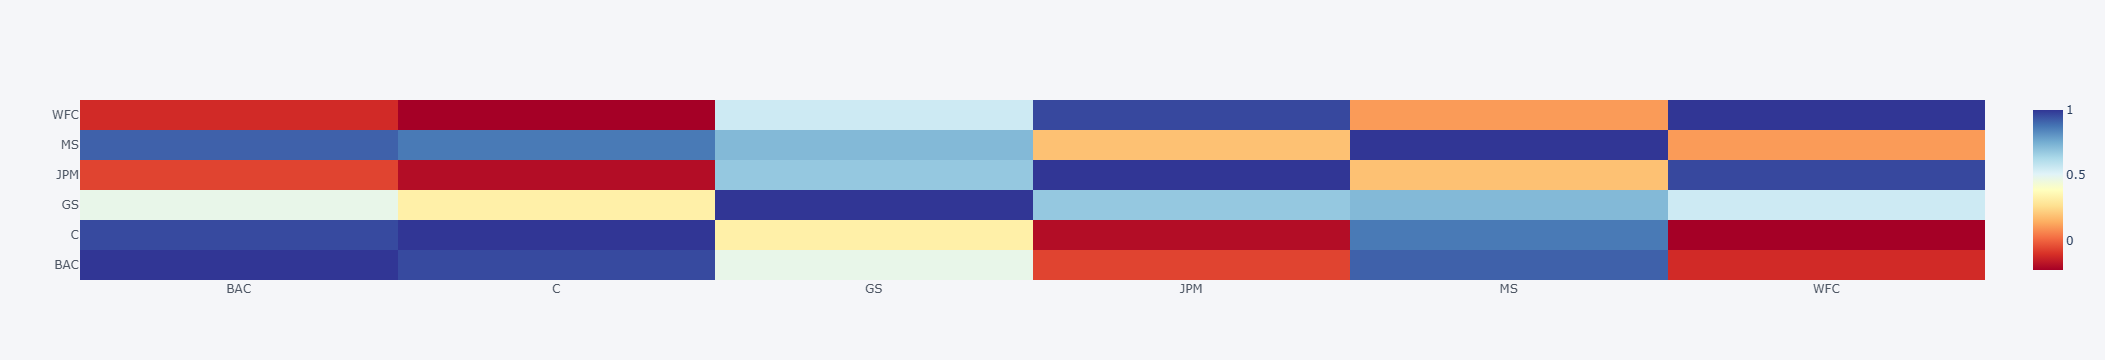

In [108]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

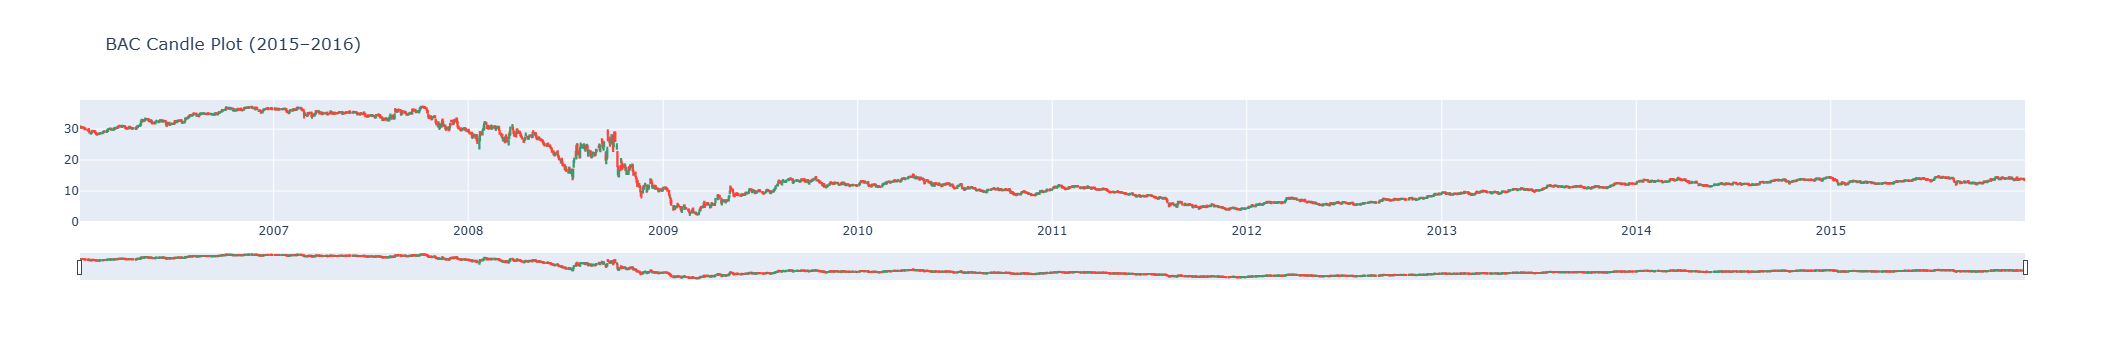

In [109]:
import plotly.graph_objects as go

bac = bank_stocks.xs('BAC', axis=1, level='Bank Ticker')

fig = go.Figure(data=[go.Candlestick(
    x=bac.index,
    open=bac['Open'],
    high=bac['High'],
    low=bac['Low'],
    close=bac['Close']
)])

fig.update_layout(title="BAC Candle Plot (2015–2016)")
fig.show()

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

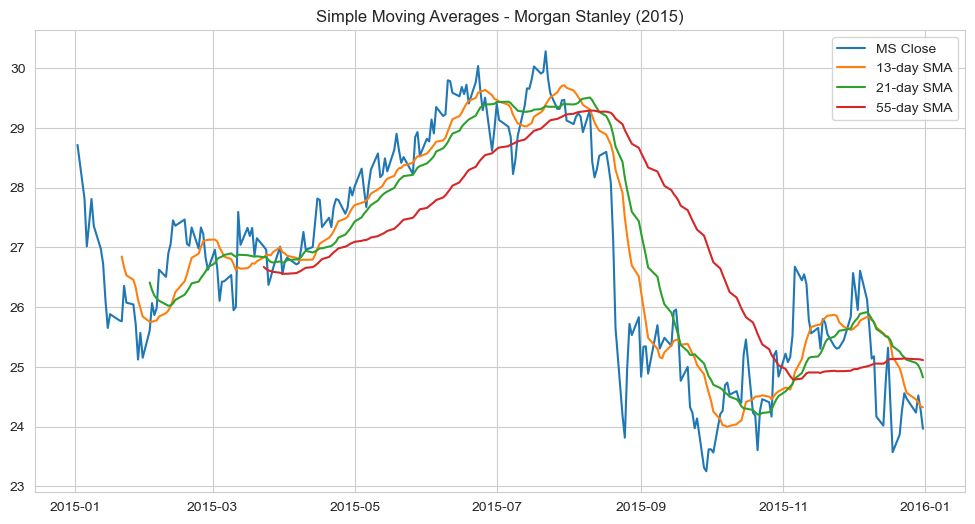

In [110]:
plt.figure(figsize=(12,6))

ms_close = bank_stocks.xs('MS', axis=1, level='Bank Ticker')['Close']
ms_2015 = ms_close.loc['2015-01-01':'2016-01-01']

plt.plot(ms_2015, label='MS Close')
plt.plot(ms_2015.rolling(13).mean(), label='13-day SMA')
plt.plot(ms_2015.rolling(21).mean(), label='21-day SMA')
plt.plot(ms_2015.rolling(55).mean(), label='55-day SMA')

plt.title('Simple Moving Averages - Morgan Stanley (2015)')
plt.legend()
plt.show()


**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

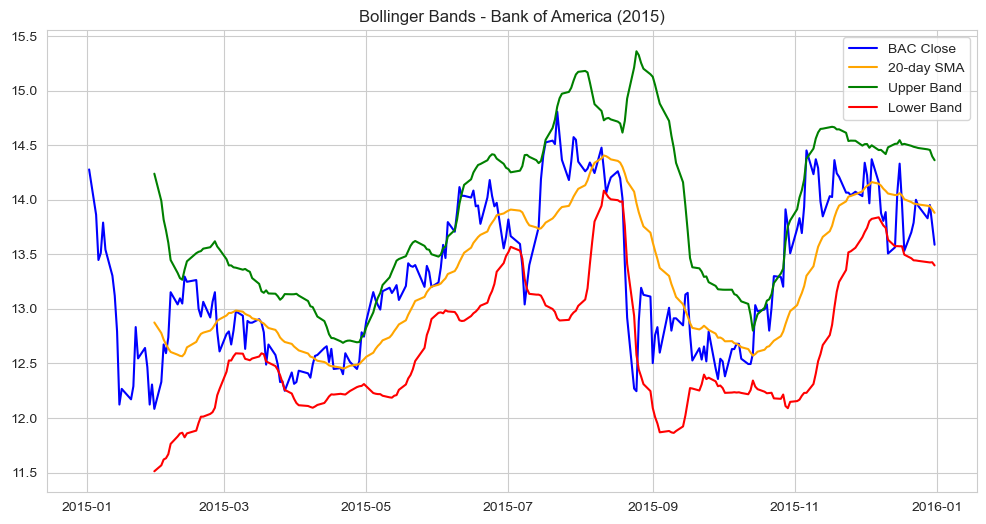

In [111]:
plt.figure(figsize=(12,6))

bac_close = bank_stocks.xs('BAC', axis=1, level='Bank Ticker')['Close']
bac_2015 = bac_close.loc['2015-01-01':'2016-01-01']

sma_20 = bac_2015.rolling(20).mean()
std_20 = bac_2015.rolling(20).std()

upper_band = sma_20 + (2 * std_20)
lower_band = sma_20 - (2 * std_20)

plt.plot(bac_2015, label='BAC Close', color='blue')
plt.plot(sma_20, label='20-day SMA', color='orange')
plt.plot(upper_band, label='Upper Band', color='green')
plt.plot(lower_band, label='Lower Band', color='red')

plt.title('Bollinger Bands - Bank of America (2015)')
plt.legend()
plt.show()


# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.